# Example Image Captioning with `ClipCap`

Note : the warnings in the below cells are normal, they are due to weights convertion from the `pytorch` checkpoints to my `tensorflow` implementation.

In [2]:
import os
import numpy as np
import tensorflow as tf

from loggers import set_level
from models import get_pretrained
from utils import normalize_filename, plot
from utils.image import display_image, load_image
from models.siamese import CLIP
from models.image_captioning import ClipCap

model_name = 'clip_cap'

print('Tensorflow version : {}'.format(tf.__version__))

Tensorflow version : 2.10.0


In [2]:
model = CLIP(
    nom  = 'clip_rn50x4',
    lang = 'en',
    input_size   = 288,
    text_encoder = 'clip',
    pretrained   = 'RN50x4',
    normalize = True
)

When using token / word-level tokenizer, it can be useful to add 'detach_punctuation' in cleaners
Initializing model with kwargs : {'comparator': {'architecture_name': 'clip', 'normalize': True, 'distance_metric': 'dp', 'pretrained_name': 'RN50x4'}}


  warnings.warn('Unable to determine the root based on candidates : {}'.format(parts))
  warnings.warn('Unable to determine the root based on candidates : {}'.format(parts))


Weights transfered successfully !
Initializing submodel : `comparator` !
Submodel comparator saved in pretrained_models\clip_rn50x4\saving\comparator.json !
Model clip_rn50x4 initialized successfully !


In [3]:
model = ClipCap(nom = model_name, lang = 'en', pretrained = 'transformer')
print(model)

Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Using pad_token, but it is not set yet.
Using sep_token, but it is not set yet.
Using mask_token, but it is not set yet.


When using token / word-level tokenizer, it can be useful to add 'detach_punctuation' in cleaners
Loading pretrained weights from pretrained_models\pretrained_weights\transformer_weights.pt
Weights transfered successfully !
Variable generator/sos_token:0 from layer generator/sos_token:0 does not have any mapping : re-using its current weights
Variable generator/eos_token:0 from layer generator/eos_token:0 does not have any mapping : re-using its current weights
Weights transfered successfully !
Initializing model with kwargs : {'model': <custom_architectures.transformers_arch.clip_cap_arch.ClipCap object at 0x0000011CBAC60670>}
Initializing submodel : `model` !
Submodel model saved in pretrained_models\clip_cap\saving\model.json !
Model clip_cap initialized successfully !

========== clip_cap ==========
Sub model model
- Inputs 	: unknown
- Outputs 	: unknown
- Number of layers 	: 2
- Number of parameters 	: 181.960 Millions
- Model not compiled

Transfer-learning from : transformer
Al

## Model initialization

In [4]:
model = get_pretrained(model_name)

print(model)

When using token / word-level tokenizer, it can be useful to add 'detach_punctuation' in cleaners
Model restoration...
Timers for logger timer :
- ClipCap call : 1.923 sec
  - Mapper call : 1.260 sec
    - Transformer block call : 0.329 sec
      - build_mask : 0.011 sec
      - layer call executed 8 times : 0.315 sec (0.039 sec / exec)
        - MHA call executed 8 times : 0.200 sec (0.025 sec / exec)
          - process_qkv executed 8 times : 0.136 sec (0.017 sec / exec)
            - split_heads executed 24 times : 0.017 sec (0.001 sec / exec)
          - scaled_dot_product_attention executed 8 times : 0.017 sec (0.002 sec / exec)
            - compute_attention executed 8 times : 0.011 sec (0.001 sec / exec)
          - merge_heads executed 8 times : 0.005 sec (0.001 sec / exec)
        - FFN call executed 8 times : 0.077 sec (0.010 sec / exec)
      - format_output : 0.000 sec
  - Text Transformer call : 0.661 sec
    - token embedding call : 0.073 sec
      - embed_tokens : 0.029

## Prediction

2 inference's methods are supported : *greedy* and *Beam-Search (BS) based* inference. By default, the mode is greedy as it is faster but it will probably be modified in future version as the BS-based inference give better results !

To change the mode, simply pass `method = 'beam'` as kwarg to the `predict` method (see the 3rd cell below for example). As you can see, the prediction's quality is much better in the `BS-based` method !

In [9]:
set_level('info') # set to 'time' to have the performances

img_dir  = ''
#filename = os.path.join(img_dir, np.random.choice(os.listdir(img_dir)))

filename = 'lena.jpg'

print(filename)
out = model.predict(filename, max_length = 50, save = False)

lena.jpg
Embedding key embedding is not in data, embedding it !


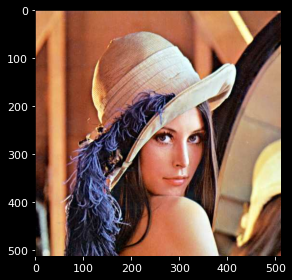

Output #0 : A woman in a hat and a hat with a bow is standing in front of a window.                               


In [10]:
plot(load_image(filename))
for b, o in enumerate(out):
    beams = o['text'] if isinstance(o['text'], list) else [o['text']]
    for i, beam in enumerate(beams):
        print('Output #{} : {}'.format(i, beam))

lena.jpg
Embedding key embedding is not in data, embedding it !


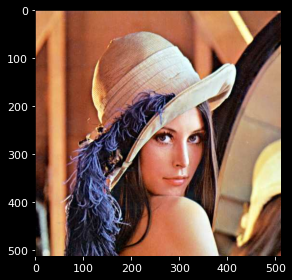

Output #0 : A picture of a woman with a hat on.                                        


In [12]:
img_dir  = ''
#filename = os.path.join(img_dir, np.random.choice(os.listdir(img_dir)))

filename = 'lena.jpg'

print(filename)
out = model.predict(filename, max_length = 50, save = False, method = 'beam', num_sentences = 1)

plot(load_image(filename))
for b, o in enumerate(out):
    beams = o['text'] if isinstance(o['text'], list) else [o['text']]
    for i, beam in enumerate(beams):
        print('Output #{} : {}'.format(i, beam))